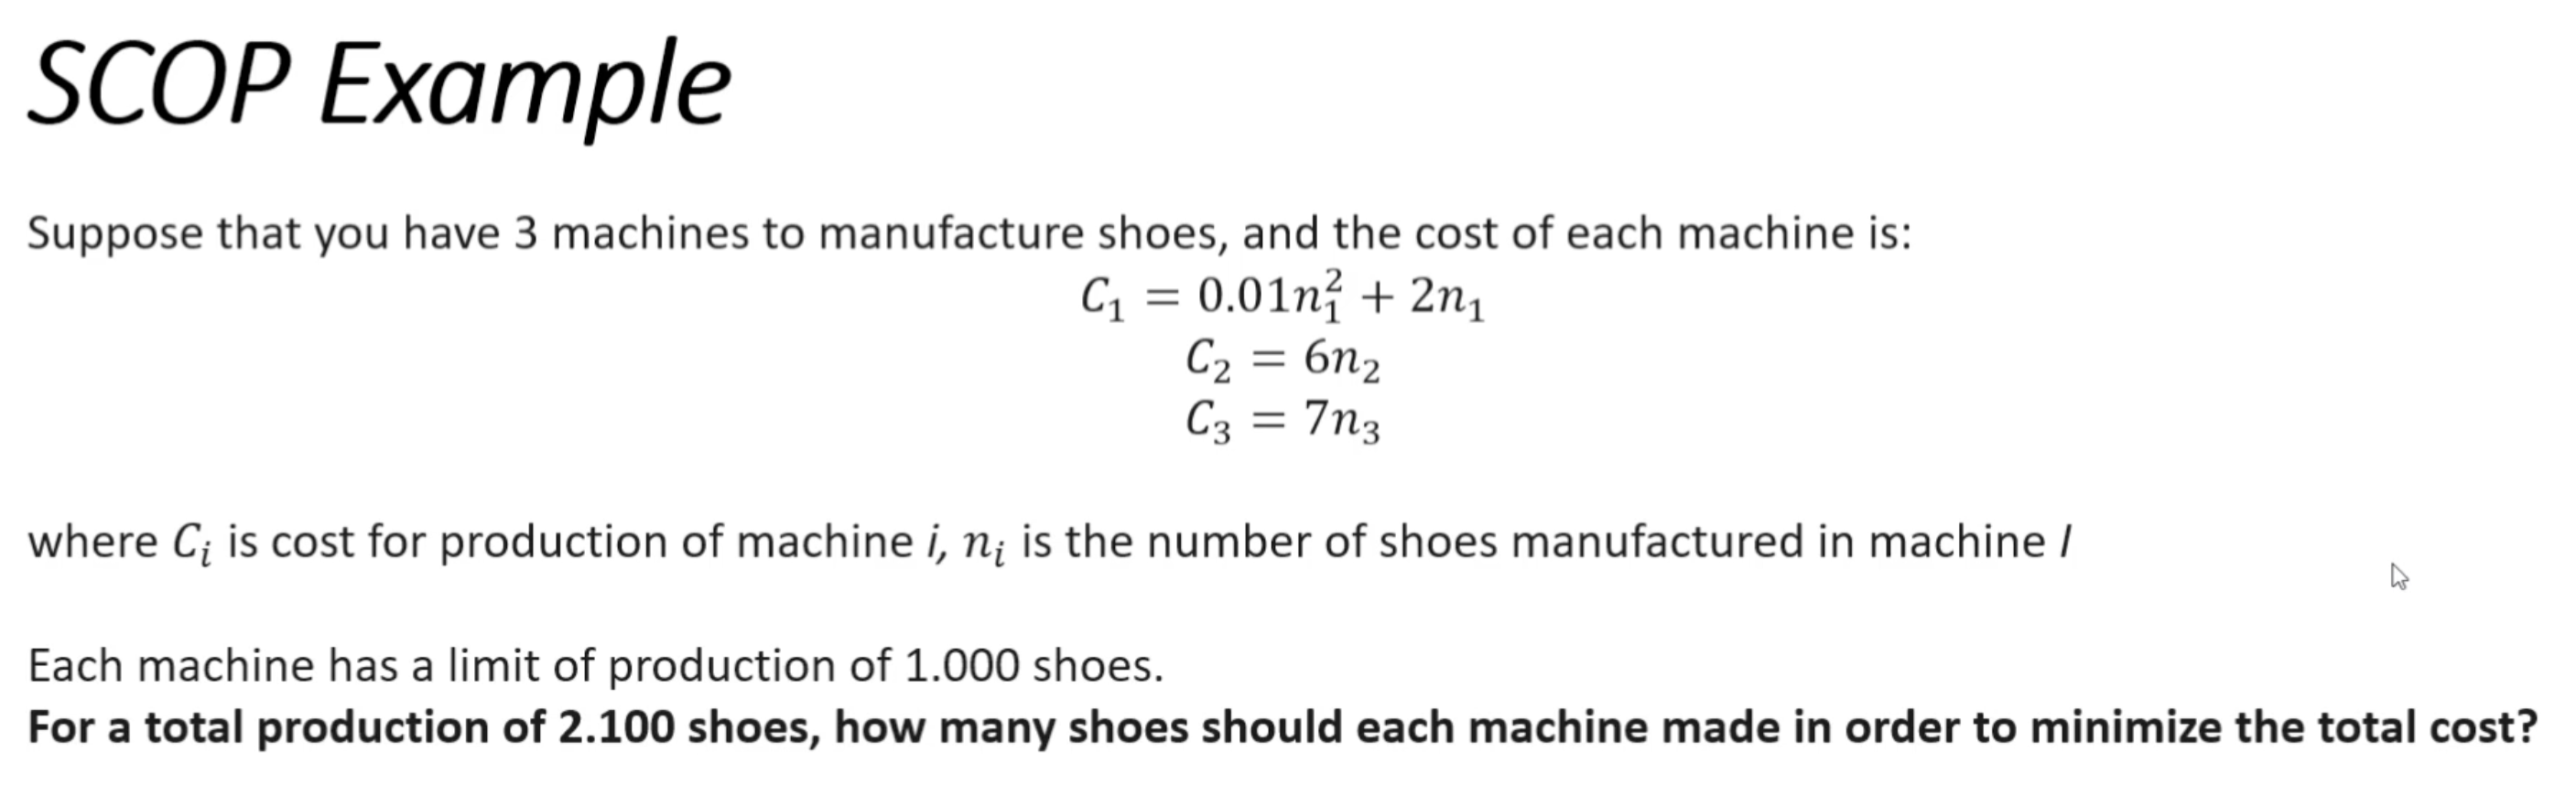

In [36]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory

model = pyo.ConcreteModel()

range_i = range(1, 4)

# Creating 3 x-variables:
model.x = pyo.Var(range_i, within=Integers, bounds=(0, None))
x = model.x
x_sum = sum([x[i] for i in range_i])


# Constraint 2:
model.C2 = pyo.ConstraintList()
for i in range_i:
    model.C2.add(expr = x[i]<=1000)

# Constraint 3: x[1] + x[2] + x[3] = 2100
C3_sum = sum(x[i] for i in range_i)
model.C3 = pyo.Constraint(expr = C3_sum ==2100)
 
# Minimization:  
model.obj = pyo.Objective(expr= 0.01*(x[1])**2 + 2*x[1] + 6*x[2] + 7*x[3], sense=minimize)


opt = SolverFactory('mindtpy')
opt.solve(model, mip_solver='glpk', nlp_solver='ipopt')

model.pprint()

2 Set Declarations
    C2_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {1, 2, 3}
    x_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {1, 2, 3}

1 Var Declarations
    x : Size=3, Index=x_index
        Key : Lower : Value  : Upper : Fixed : Stale : Domain
          1 :     0 :  273.0 :  None : False : False : Integers
          2 :     0 : 1000.0 :  None : False : False : Integers
          3 :     0 :  827.0 :  None : False : False : Integers

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 0.01*x[1]**2 + 2*x[1] + 6*x[2] + 7*x[3]

2 Constraint Declarations
    C2 : Size=3, Index=C2_index, Active=True
        Key : Lower : Body : Upper  : Active
          1 :  -Inf : x[1] : 1000.0 :   True
          2 :  -Inf : x[2] : 

In [44]:
import numpy as np

optimal_x_sum = 0
for i in range_i:
    print(f"The value of {x[i]} = {pyo.value(x[i])}")
    optimal_x_sum += pyo.value(x[i])
    
optimal_value = 0.01*(pyo.value(x[1]))**2 + 2*pyo.value(x[1]) + 6*pyo.value(x[2]) + 7*pyo.value(x[3])

print('---------------------------------------------------------------------')
print(f"The minimum value is {optimal_value}")

The value of x[1] = 273.0
The value of x[2] = 1000.0
The value of x[3] = 827.0
---------------------------------------------------------------------
The minimum value is 13080.29
